In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['figure.figsize'] = 20,20
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds1 = pd.read_csv('eo1.csv') 
ds2 = pd.read_csv('eo2.csv') 
ds3 = pd.read_csv('eo3.csv')

In [5]:
ds1.head() #Dataset 


,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [8]:
ds1.STATE.unique()# NorthEast Region of US - 8 States

array(['MA', 'NY', 'NJ', 'ME', 'NH', 'VT', 'CT', 'RI'], dtype=object)

In [9]:
ds2.STATE.unique() # MidWest/MidAtlantic Region of US - 19 States

array(['KY', 'VA', 'IN', 'MI', 'MD', 'DC', 'PA', 'SC', 'OH', 'WI', 'ND',
       'NC', 'IL', 'MN', 'DE', 'WV', 'IA', 'SD', 'NE'], dtype=object)

In [10]:
ds3.STATE.unique() # SouthEast/Western Region of US - 24 States

array(['FL', 'MO', 'CA', 'TX', 'CO', 'TN', 'AR', 'KS', 'GA', 'AL', 'AZ',
       'UT', 'WA', 'OK', 'HI', 'LA', 'NV', 'MS', 'ID', 'AK', 'NM', 'MT',
       'OR', 'WY'], dtype=object)

In [16]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240579 entries, 0 to 240578
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EIN               240579 non-null  int64  
 1   NAME              240579 non-null  object 
 2   ICO               158726 non-null  object 
 3   STREET            240579 non-null  object 
 4   CITY              240579 non-null  object 
 5   STATE             240579 non-null  object 
 6   ZIP               240579 non-null  object 
 7   GROUP             240579 non-null  int64  
 8   SUBSECTION        240579 non-null  int64  
 9   AFFILIATION       240579 non-null  int64  
 10  CLASSIFICATION    240579 non-null  int64  
 11  RULING            240579 non-null  int64  
 12  DEDUCTIBILITY     240579 non-null  int64  
 13  FOUNDATION        240579 non-null  int64  
 14  ACTIVITY          240579 non-null  int64  
 15  ORGANIZATION      240579 non-null  int64  
 16  STATUS            24

In [17]:
ds1.INCOME_AMT.describe()

count    1.962080e+05
mean     4.437857e+06
std      2.316616e+08
min     -1.837054e+06
25%      0.000000e+00
50%      2.235100e+04
75%      2.254545e+05
max      8.533663e+10
Name: INCOME_AMT, dtype: float64

In [18]:
ds1.REVENUE_AMT.describe()

count    1.715100e+05
mean     3.180054e+06
std      1.014143e+08
min     -3.828561e+07
25%      0.000000e+00
50%      4.492000e+03
75%      1.534605e+05
max      3.277372e+10
Name: REVENUE_AMT, dtype: float64

In [19]:
# Finding Top 10 Non-Profit for Region
ne = ds1.sort_values('INCOME_AMT', ascending=False)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']].head(10)
ne['Region'] = 'NorthEast'

In [20]:
print(ne)

                                             NAME        CITY STATE  \
14718    PRESIDENT AND FELLOWS OF HARVARD COLLEGE   CAMBRIDGE    MA   
172333  SELENA THOMAS JACKSON PROFIT ORGANIZATION        LYNN    MA   
14728       MASSACHUSETTS INSTITUTE OF TECHNOLOGY   CAMBRIDGE    MA   
87069                          CORNELL UNIVERSITY      ITHACA    NY   
47426   FIDELITY INVESTMENTS CHARITABLE GIFT FUND      BOSTON    MA   
237668             PARTNERS HEALTHCARE SYSTEM INC  SOMERVILLE    MA   
36380                             YALE UNIVERSITY   NEW HAVEN    CT   
77059                         NEW YORK UNIVERSITY    NEW YORK    NY   
54885     NEW YORK STATE CATHOLIC HEALTH PLAN INC   REGO PARK    NY   
73536          NEW YORK AND PRESBYTERIAN HOSPITAL    NEW YORK    NY   

           ASSET_AMT    INCOME_AMT   REVENUE_AMT     Region  
14718   7.528752e+10  8.533663e+10  4.458906e+09  NorthEast  
172333  0.000000e+00  3.403211e+10  3.277372e+10  NorthEast  
14728   2.217703e+10  2.635005e+

In [21]:
# Finding Top 10 Non-Profit for Region
mw = ds2.sort_values('INCOME_AMT', ascending=False)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']].head(10)
mw['Region'] = 'MidWest/MidAtlantic'


In [22]:
print(mw)

                                                     NAME          CITY STATE  \
238485  CENTRAL STATES SOUTHEAST & SOUTHWEST AREAS HEA...      ROSEMONT    IL   
606180                    UAW RETIREE MEDICAL BENEFITS TR       DETROIT    MI   
543295                    HOWARD HUGHES MEDICAL INSTITUTE   CHEVY CHASE    MD   
617933                                               AARP    WASHINGTON    DC   
308300                   THRIVENT FINANCIAL FOR LUTHERANS   MINNEAPOLIS    MN   
507294                                    DUKE UNIVERSITY        DURHAM    NC   
46716          TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA  PHILADELPHIA    PA   
507129                  STATE CHARTERED CREDIT UNIONS INC       RALEIGH    NC   
40233                                                UPMC    PITTSBURGH    PA   
331007       WORKERS COMPENSATION REINSURANCE ASSOCIATION       ST PAUL    MN   

           ASSET_AMT    INCOME_AMT   REVENUE_AMT               Region  
238485  5.623619e+09  8.053682e+10  

In [23]:
# Finding Top 10 Non-Profit for Region
se = ds3.sort_values('INCOME_AMT', ascending=False)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']].head(10)
se['Region'] = 'SouthEast/West'


In [24]:
print(se)

                                                     NAME           CITY  \
714460                  KAISER FOUNDATION HEALTH PLAN INC       PORTLAND   
685426              BILL & MELINDA GATES FOUNDATION TRUST        SEATTLE   
713502                        KAISER FOUNDATION HOSPITALS       PORTLAND   
713625  THE BOARD OF TRUSTEES OF THE LELAND STANFORD J...      PALO ALTO   
400442  ADVENTIST HEALTH SYSTEM SUNBELT HEALTHCARE COR...  ALTAMONTE SPG   
228022                                      BANNER HEALTH        PHOENIX   
723005                            IHC HEALTH SERVICES INC  SALT LAKE CTY   
722080                                      SUTTER HEALTH     SACRAMENTO   
713900                                     DIGNITY HEALTH  SAN FRANCISCO   
396446                ADVENTIST HEALTH SYSTEM SUNBELT INC  ALTAMONTE SPG   

       STATE     ASSET_AMT    INCOME_AMT   REVENUE_AMT          Region  
714460    OR  1.917314e+10  7.254886e+10  4.846638e+10  SouthEast/West  
685426    WA  3.9

In [25]:
merged_data = [ne, mw, se]
print(merged_data)

[                                             NAME        CITY STATE  \
14718    PRESIDENT AND FELLOWS OF HARVARD COLLEGE   CAMBRIDGE    MA   
172333  SELENA THOMAS JACKSON PROFIT ORGANIZATION        LYNN    MA   
14728       MASSACHUSETTS INSTITUTE OF TECHNOLOGY   CAMBRIDGE    MA   
87069                          CORNELL UNIVERSITY      ITHACA    NY   
47426   FIDELITY INVESTMENTS CHARITABLE GIFT FUND      BOSTON    MA   
237668             PARTNERS HEALTHCARE SYSTEM INC  SOMERVILLE    MA   
36380                             YALE UNIVERSITY   NEW HAVEN    CT   
77059                         NEW YORK UNIVERSITY    NEW YORK    NY   
54885     NEW YORK STATE CATHOLIC HEALTH PLAN INC   REGO PARK    NY   
73536          NEW YORK AND PRESBYTERIAN HOSPITAL    NEW YORK    NY   

           ASSET_AMT    INCOME_AMT   REVENUE_AMT     Region  
14718   7.528752e+10  8.533663e+10  4.458906e+09  NorthEast  
172333  0.000000e+00  3.403211e+10  3.277372e+10  NorthEast  
14728   2.217703e+10  2.635005e

In [26]:
results = pd.concat(merged_data)


In [27]:
print(results)

                                                     NAME           CITY  \
14718            PRESIDENT AND FELLOWS OF HARVARD COLLEGE      CAMBRIDGE   
172333          SELENA THOMAS JACKSON PROFIT ORGANIZATION           LYNN   
14728               MASSACHUSETTS INSTITUTE OF TECHNOLOGY      CAMBRIDGE   
87069                                  CORNELL UNIVERSITY         ITHACA   
47426           FIDELITY INVESTMENTS CHARITABLE GIFT FUND         BOSTON   
237668                     PARTNERS HEALTHCARE SYSTEM INC     SOMERVILLE   
36380                                     YALE UNIVERSITY      NEW HAVEN   
77059                                 NEW YORK UNIVERSITY       NEW YORK   
54885             NEW YORK STATE CATHOLIC HEALTH PLAN INC      REGO PARK   
73536                  NEW YORK AND PRESBYTERIAN HOSPITAL       NEW YORK   
238485  CENTRAL STATES SOUTHEAST & SOUTHWEST AREAS HEA...       ROSEMONT   
606180                    UAW RETIREE MEDICAL BENEFITS TR        DETROIT   
543295      

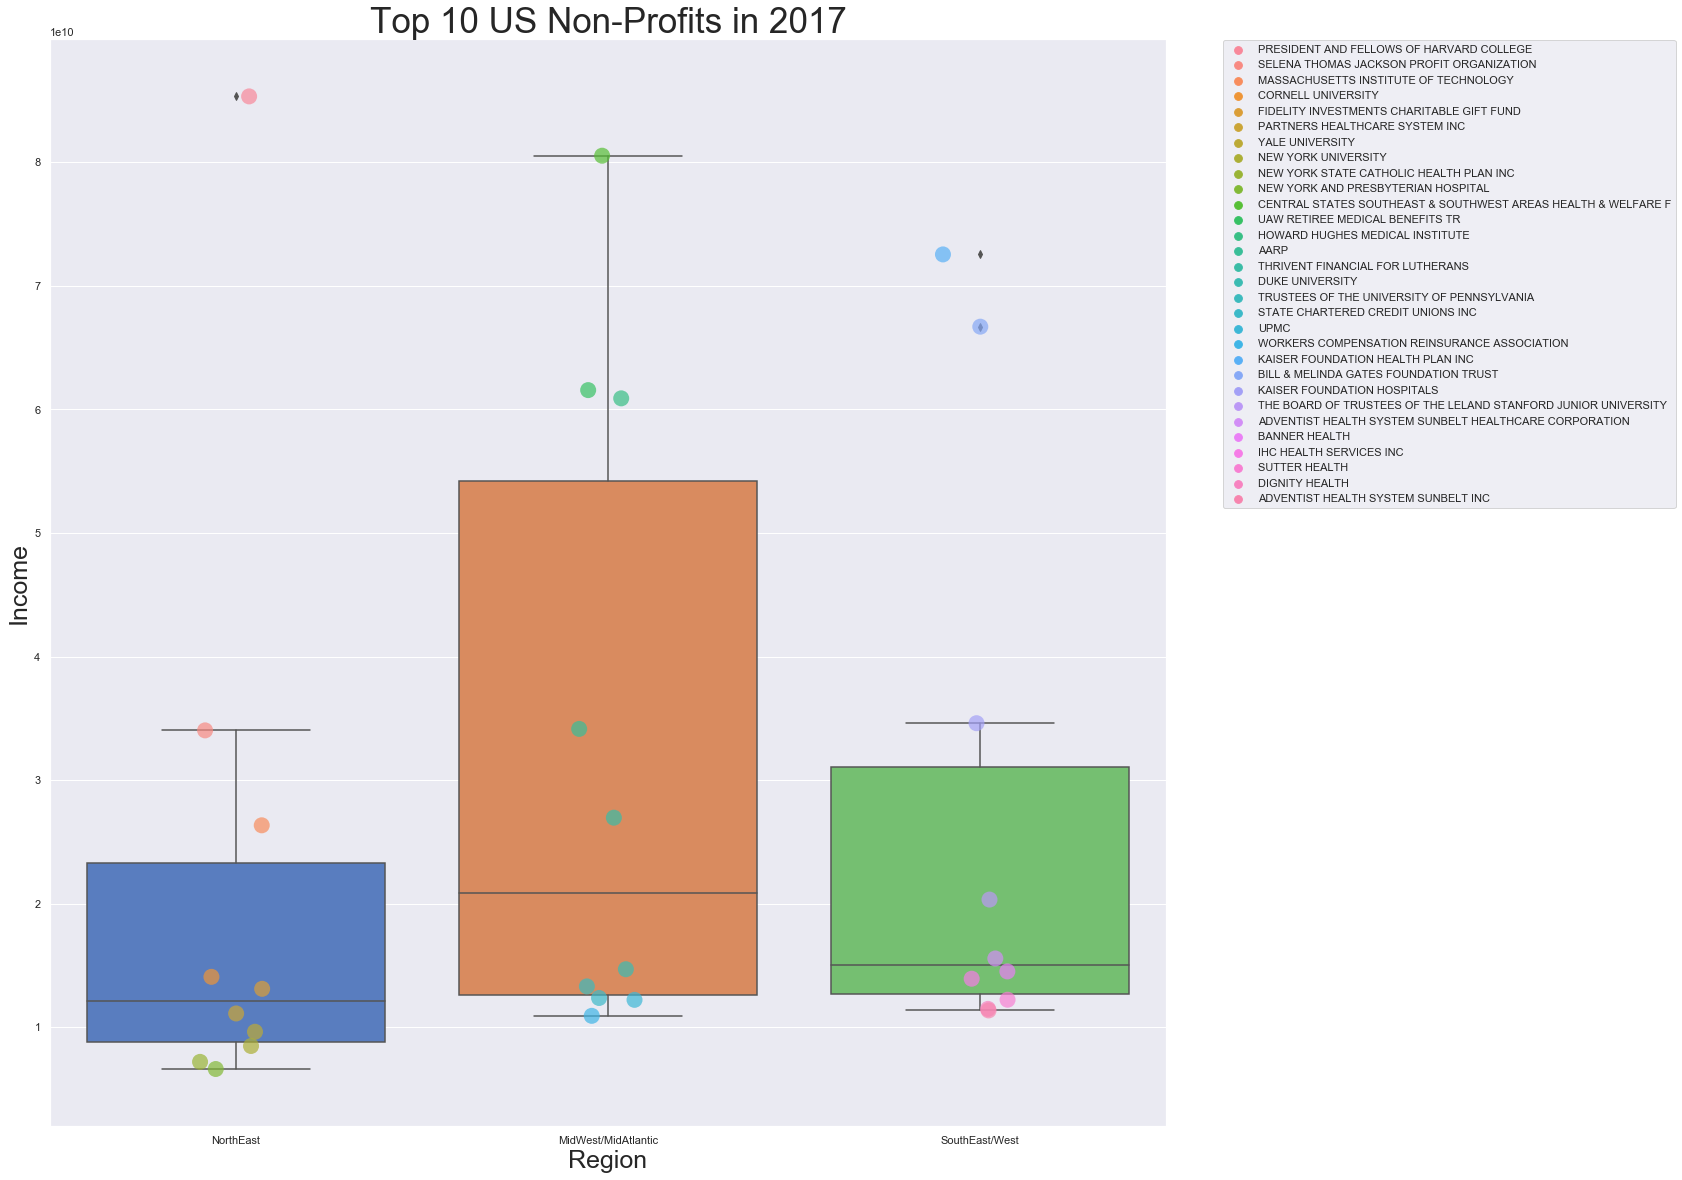

In [28]:
#Plot Style
sns.set(style="darkgrid", palette="muted", color_codes=True)
#Create BoxPlot and Add Points
a = sns.boxplot(data = results, x = 'Region', y = 'INCOME_AMT')
sns.stripplot(x='Region', y='INCOME_AMT', data=results, jitter=True, size=16, linewidth=0, hue = 'NAME', alpha=0.7)
#Legend and Titles
a.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.1)
a.axes.set_title('Top 10 US Non-Profits in 2017',fontsize=35)
a.set_xlabel('Region',fontsize=25)
a.set_ylabel('Income',fontsize=25)
plt.show()

In [155]:
## Creating new DataSet with 10 Total Non-Profits based on States

In [31]:
# Use the groupby function to exact the data giving us the top 10 from each state.
new_ds1 = ds1.sort_values("INCOME_AMT", ascending=False).groupby("STATE").head(10)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']]
new_ds2 = ds2.sort_values("INCOME_AMT", ascending=False).groupby("STATE").head(10)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']]
new_ds3 = ds3.sort_values("INCOME_AMT", ascending=False).groupby("STATE").head(10)[['NAME', 'CITY', 'STATE', 'ASSET_AMT',
                                                     'INCOME_AMT','REVENUE_AMT']]

In [35]:
#Merge and Concat Data
merged_state_list = [new_ds1, new_ds2, new_ds3]

final_set = pd.concat(merged_state_list)
print(final_set)

                                               NAME       CITY STATE  \
14718      PRESIDENT AND FELLOWS OF HARVARD COLLEGE  CAMBRIDGE    MA   
172333    SELENA THOMAS JACKSON PROFIT ORGANIZATION       LYNN    MA   
14728         MASSACHUSETTS INSTITUTE OF TECHNOLOGY  CAMBRIDGE    MA   
87069                            CORNELL UNIVERSITY     ITHACA    NY   
47426     FIDELITY INVESTMENTS CHARITABLE GIFT FUND     BOSTON    MA   
...                                             ...        ...   ...   
640980          LEA COUNTY ELECTRIC COOPERATIVE INC  LOVINGTON    NM   
635607                        HIGH PLAINS POWER INC   RIVERTON    WY   
625149         COMMUNITY FOUNDATION OF JACKSON HOLE    JACKSON    WY   
623859               LOWER VALLEY POWER & LIGHT INC      AFTON    WY   
624680  SARGENT FOUNDATION FOR EPISCOPAL MINISTRIES     CASPER    WY   

           ASSET_AMT    INCOME_AMT   REVENUE_AMT  
14718   7.528752e+10  8.533663e+10  4.458906e+09  
172333  0.000000e+00  3.403211e+1

In [37]:
# Exporting File to CSV for further Anaylsis on Tableau
final_set.to_csv('2017_Non_Profit_Data.csv')